# Part I - (Prosper Loan Data Exploration)


## Table of content
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#prelim">Preliminary Wrangling</a></li>
<li><a href="#about">About the Data</a></li>
<li><a href="#features">Features of Interest</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>


<a id='intro'></a>
## Introduction
The Prosper Loan dataset contains information about over 110,000 loan listings and 81 features relating to  the loan. The dataset was provided by Udacity and was downloaded manually from the link provided in the classroom. Some popular features include:
- `LoanStatus` - Indicating the status of the loan. Whether it's cancelled, completed, defaulted or even past due date.
- `ListingCategory` - The reason the borrower took the loan. Examples include Auto, Engagement rings, Wedding loans, and reasons as weird as Taxes.
- `Occupation` - This contains the occupation of the borrower.

We would be exploring various features in this dataset and their relationship with each other. Before doing that, we have to examine our dataset to be sure that it's ready for exploration.

<a id='prelim'></a>
## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic command to display all charts in this notebook
%matplotlib inline

In [2]:
# reading in the csv into a pandas dataframe and viewing it for assessment
loan = pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

<a id='about'></a>
## About the Data

The dataset contains 113,937 rows denoting loan listings and 81 columnns representing different variables relating to the loan. Most of the variables are categorical and contains a lot of insights that is glaring just by assessing the dataset visually. The quantitative columns would also be useful for analysis. Two things we could do though, would be to convert all the date columns from object data type to `datetime`, and after we decide what columns would be needed for our exploration, we can then convert the categorical columns to `categorical` data type.

In [5]:
# creating a list of the date columns that needs the data type changed
date_columns = ['ListingCreationDate','ClosedDate','LoanOriginationDate']

# using a for loop to change the columns data type
for col in date_columns:
    loan[col] = pd.to_datetime(loan[col])

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

<a id='features'></a>
## Features of Interest

One major focus in this analysis would be the `LoanOriginalAmount`. Apart from the loan amount, exploring the demography of borrowers could tell us something they have in common.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

We can hypothesize that the borrowers `occupation` and `IncomeRange` would influence the amount one can get.The `StatedMonthlyIncome` can also be a determinant. Credit score could tell us the probability of the success of a loan's application.

<a id='univariate'></a>
## Univariate Exploration

This exploration focuses on various individual features and how they are distributed

### Question

What are the different loan statuses and their individual distribution?

### Visualization

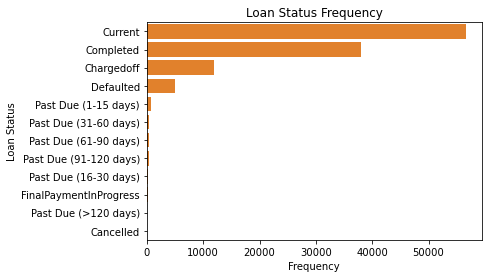

In [8]:
# assigning the first color in the color palette to a color variable to use as an argument to prevent too much colors
color = sns.color_palette()[1]
# sort by descending order using value_counts and assigning the index to an order variable to use as the order argument
order = loan.LoanStatus.value_counts().index
# using the seaborn's countplot function to display the frequency of the different loan statuses
sns.countplot(data=loan, y='LoanStatus', color=color, order=order)

# creating a function for chart name, x and y labels, to avoid repetition in using the plt function
def labels(a,b,c):
    """
    This function gives chart title, x and y axis
    --------
    It aims to avoid repetition by taking in three parameters for the chart title and both the x and y axis labels
    """
    return plt.title(a),plt.ylabel(b),plt.xlabel(c)
labels('Loan Status Frequency','Loan Status','Frequency');

### Observation

From the visualization above, majority of the listings are still current loans, although a huge number of the loan listings have been completed. Only a handful are past behind on payment. Some have defaulted, while others have even been charged off due to perpetual defaulting. It can also be noted that people rarely cancel their loan listings as that category has the lowest frequency.

### Question

What different loan terms are there, what are their frequencies?

### Visualization

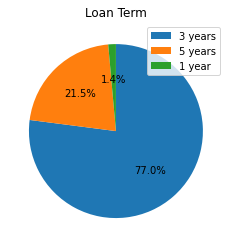

In [10]:
pie_data = loan.Term.value_counts()
plt.pie(pie_data, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Loan Term')
plt.legend(labels=['3 years','5 years','1 year']);

### Observation

Most of the loans taken were for 3 years(36 months), while 12 months loan had the least frequency. With some loans being for 5 years(60 months).

### Question

The `ProsperScore` column shows a custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Let's visualize the count and see what category different borrowers fall under.

### Visualization

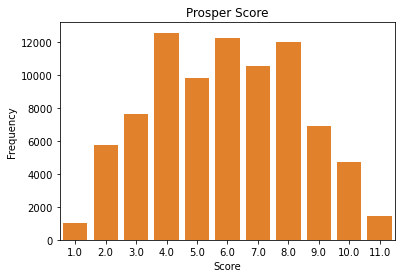

In [11]:
color = sns.color_palette()[1]
sns.countplot(data=loan, x='ProsperScore', color=color)

labels('Prosper Score','Frequency','Score');

### Observation

The high points are 4, 6, and 8. The lowest being 1. This signifies that borrowers with the highest risk score are the least population in the dataset. Most borrowers fall within 4-8 risk score. There is also a category of borrowers that fall within 11. This could be as a result of incorrect data and the rows might need to be dropped.

### Question

The `ListingCategory` column is a very vital column as it tells us the reason the borrower took the loan. The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans. Let's try to find out the category that tops the list.

### Visualization

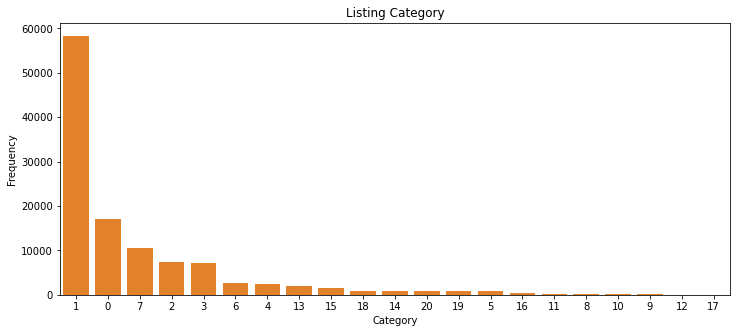

In [12]:
# Let's create another function that we would use to call ethe figsize subsequently
def fig_size(a,b):
    # calling figsize parameters
    return plt.figure(figsize=(a,b))

fig_size(12,5)
color = sns.color_palette()[1]
order = loan['ListingCategory (numeric)'].value_counts().index
sns.countplot(data=loan, x='ListingCategory (numeric)', color=color, order=order)

labels('Listing Category','Frequency','Category');

### Observation

Debt Consolidation is the number one reason why people take out new loans. Home improvement loans and Business loans trail behind some loans termed 'Other' or 'Not available' to signify that the borrower didn't specify their reason. Green loans and loans for boats and RVs were the least types of listings created. People also took out loans to get engagement rings.

### Question

For the borrower state, we would try to see the states where the borrowers come from. Does location have a role to play in the reason people take out loans?. The `BorrowerState` column contains a two-letter abbreviation that denotes the state the borrower is from.

### Visualization

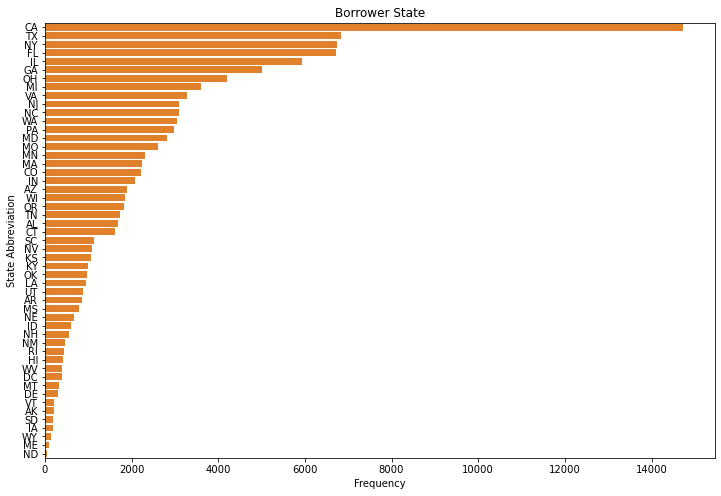

In [13]:
fig_size(12,8);
color = sns.color_palette()[1]
order = loan.BorrowerState.value_counts().index
sns.countplot(data=loan, y='BorrowerState', color=color, order=order)

labels('Borrower State','State Abbreviation','Frequency');

### Observation

For this visualization, we had to make the plot bigger in order to fully see all the states contained in the population. California has the highest number of borrowes by a wide margin. Over two times the size of population of borrowers from any other state. Texas, New York, and Florida follow suit. North Dakota, Maine and Wyoming have the lowest count of borrowers.

### Question

As speculated earlier in the Features of Interest section, occupation should be a major deciding factor as to why people take loans. Let's see how true that is.

### Visualization

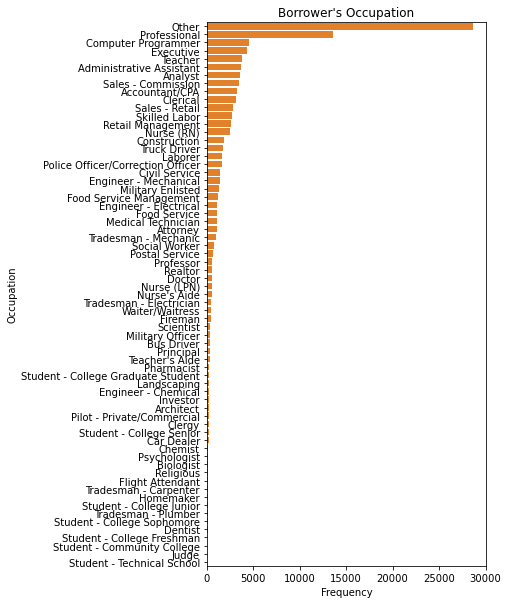

In [15]:
fig_size(5,10)
color = sns.color_palette()[1]
order = loan.Occupation.value_counts().index
sns.countplot(data=loan, y='Occupation', color=color, order=order)

labels('Borrower\'s Occupation','Occupation','Frequency');

### Observation

A large number of borrowers specified their `Occupation` to be 'Others'. The most common occupations though are Professionals, Computer Programmers and Executives. At the bottom of the list we have Techincal School and College Freshman Students and weirdly Judges.

### Question

The `Employment Status` is quite similar to the `Occupation` column. What kind of employment do the people who take the most loans have?

### Visualization

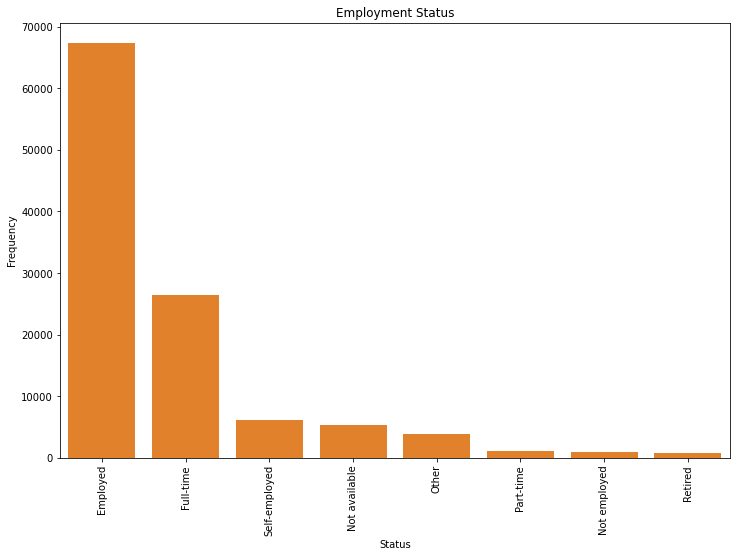

In [16]:
fig_size(12,8)
color = sns.color_palette()[1]
order = loan.EmploymentStatus.value_counts().index
sns.countplot(data=loan, x='EmploymentStatus', color=color, order=order)

labels('Employment Status','Frequency','Status')
plt.xticks(rotation='90');

### Observation

We observe that employed people are the highest loan collectors. This could be taking money in advance to take care of needs before the salary arrives. Self employed people also rank as one of the highest loan takers since they propably need it to finance their businesses.

### Question

Does the fact that the borrower is a Home Owner make them want to take a loan?

### Visualization

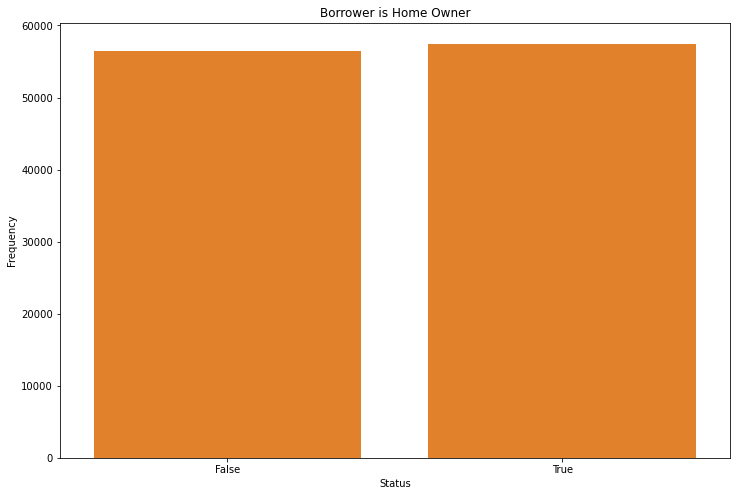

In [17]:
fig_size(12,8)
color = sns.color_palette()[1]
order = loan.IsBorrowerHomeowner.value_counts().index
sns.countplot(data=loan, x='IsBorrowerHomeowner', color=color)

labels('Borrower is Home Owner','Frequency','Status');

### Observation

The fact that a borrower is a home owner didn;t make much difference in the intention to get a loan.

### Question

People with what credit score range are most likely to take out loans?

### Visualization

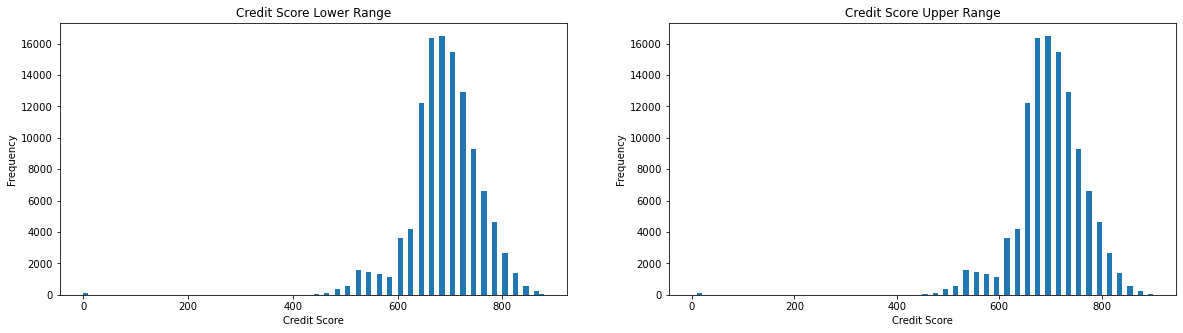

In [18]:
plt.figure(figsize = [20, 5])

bins = np.arange(0, loan.CreditScoreRangeLower.max()+10, 10)
plt.subplot(1,2,1)
plt.hist(data=loan, x='CreditScoreRangeLower', bins=bins)
labels('Credit Score Lower Range','Frequency','Credit Score')

bins = np.arange(0, loan.CreditScoreRangeUpper.max()+10, 10)
plt.subplot(1,2,2)
plt.hist(data=loan, x='CreditScoreRangeUpper', bins=bins)
labels('Credit Score Upper Range','Frequency','Credit Score');

### Observation

The charts for the upper and lower ranges are similar. The range for most borrower falls between 650-750.

#### Question

What's the most common debt to income ratio?

#### Visualization

<Figure size 360x144 with 0 Axes>

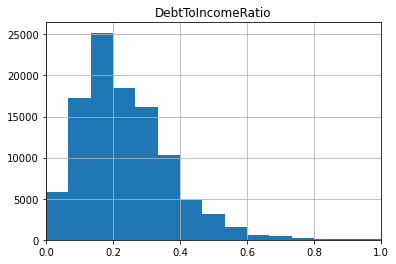

In [24]:
fig_size(5,2)
loan.hist(column='DebtToIncomeRatio', bins=150)
plt.xlim(0,1); #limiting the x-axis range to make data points obvious

### Observation

Most debt to income ratio fall between the `0.1` to `0.2` range.

### Question

Is there a particular income range associated with debt listing? Do people within a particular income range tend to take out more loans?

### Visualization

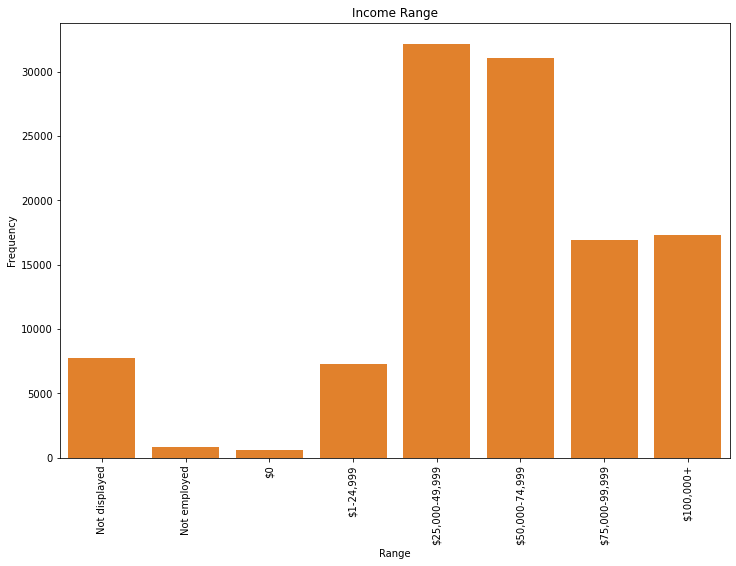

In [21]:
fig_size(12,8)
color = sns.color_palette()[1]
order = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
sns.countplot(data=loan, x='IncomeRange', color=color, order=order)

labels('Income Range','Frequency','Range')
plt.xticks(rotation='90');

### Observation

The chart reveals that the level of income doesn't really play a role in why people take loans since people with over 100k salary still make up a large portion of the loan collectors. Unemployed people, however, as revealed by the chasrt, do not take loans as much.

### Question

Do people who are not able to verify their income also take loans?

### Visualization

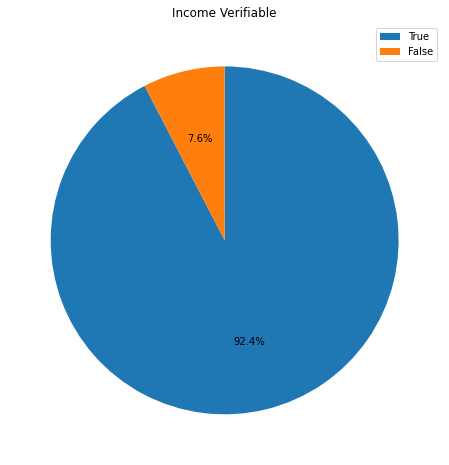

In [25]:
fig_size(12,8)
pie_data = loan.IncomeVerifiable.value_counts()
plt.pie(pie_data, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Income Verifiable')
plt.legend(labels=pie_data.index);

### Observation

Majority of the population were able to verify their incomes although 7.6% of people who couldn't verify still took loans.

### Question

The `TotalProsperLoan` column talks about the number of loan the borrower had before the new listing. Do borrowers take out more loans or are majority of the population fresh borrowers?

### Visualization

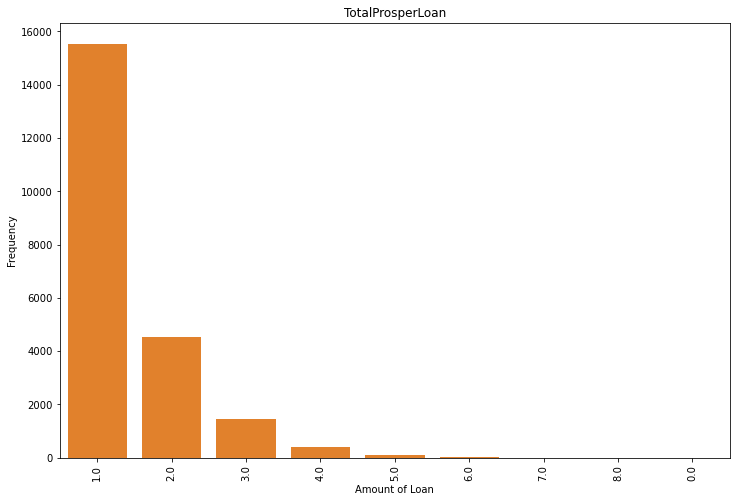

In [26]:
fig_size(12,8)
color = sns.color_palette()[1]
order = loan.TotalProsperLoans.value_counts().index
sns.countplot(data=loan, x='TotalProsperLoans', color=color, order=order)

labels('TotalProsperLoan','Frequency','Amount of Loan')
plt.xticks(rotation='90');

### Observation

Prior to this listing, the majority of the population had taken out one loan. There are rarely any new borrowers because the frequency for those with no prior loans(0) is the lowest.

### Question

How many investors are required to fund a loan. What's the majority range?

### Visualization

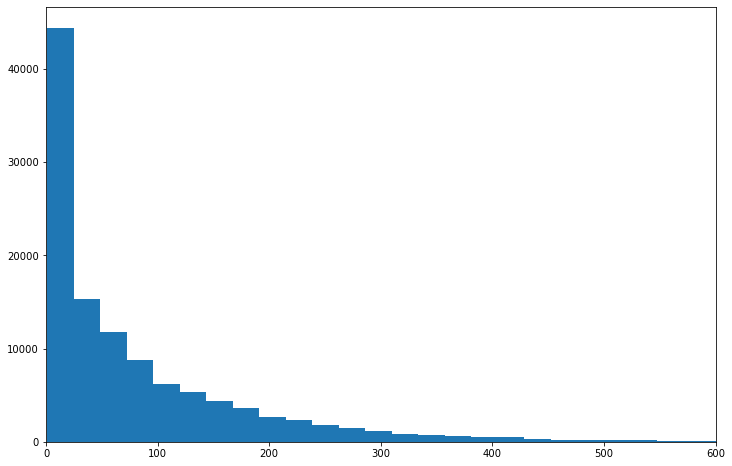

In [27]:
fig_size(12,8)
plt.hist(data=loan, x='Investors', bins=50)
plt.xlim(0,600);

### Observation

Most loans are funded by very few investors, loans that have a lot of investor fundings are quite few.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The majority of loans were taken fopr debt settlements and business purposes, while many other factors impacted the borrower's decision to take out a loan. Many persons did not identify why they were taking out the loans, and others stated 'Other' as their explanation. This was not a huge concern because they did not constitute the majority of the population. As a result, they were insignificant.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


The closest indicator to the reason people took out loans was expected to be either 'IncomeRange' or 'EmploymentStatus,' but the charts revealed otherwise, as people earning more than $100,000 still made up a large percentage of the population, and employed people took out more loans than business people. The only cleansing would be to remove the various columns that we won't need for our next step of study. This would allow us to deal with the dataset more effectively and eliminate unnecessary information.

<a id='bivariate'></a>
## Bivariate Exploration


For the Bivariate Exploration, we would be comparing two variables and trying to see whether there is a correlation between them. Other types of visualizations would be used that allows for two variables to be compared, whether qualitative or quantitative.

### Question

Does the `IncomeRange` of the borrower after the `LoanOriginalAmount`, that is, the amount the borrower can get as a loan?

### Visualization

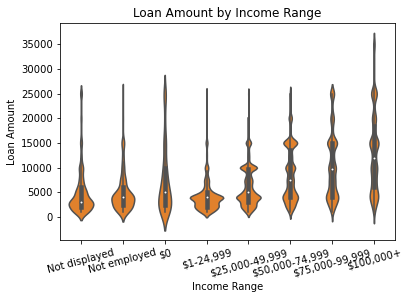

In [28]:
color = sns.color_palette()[1]
order = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
sns.violinplot(data=loan, x='IncomeRange', y='LoanOriginalAmount', color=color, order=order)
plt.xticks(rotation=15)
labels('Loan Amount by Income Range','Loan Amount','Income Range');

### Observation

There is a modest association between the customer's income range and the amount they are entitled to as a loan. Based on the breadth of the violin from the higher income range, we can see that persons earning $50,000 or more can acquire up to a $15,000 loan, as opposed to those earning less. The highest quartile and maximum values go to persons earning $100,000 or more, while the lowest loan amount belongs to people earning nothing. A violin chart was employed because it is the best graphic for demonstrating the relationship between a qualitative and quantitative variable.

### Question

Does the `IncomeRange` determine if the borrower is a Home Owner or not.

### Visualization

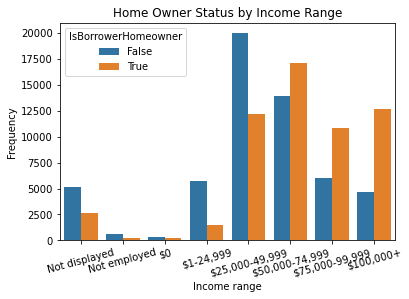

In [29]:
order = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
sns.countplot(data=loan, x='IncomeRange', hue='IsBorrowerHomeowner', order=order)
labels('Home Owner Status by Income Range','Frequency','Income range')
plt.xticks(rotation=15);

### Observation

It goes without saying that the higher the income level, the more likely borrowers are to be home owners. Borrowers earning $100,000 or more are almost 100% more likely to own a home than those who do not. The trend goes downward through borrowers earning $75k+ and 50k+ until it reaches 25k+, where borrowers who are not home owners outnumber those who are, and so on.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The monthly payment price was highly dependent on the borrower's Loan amount, as the scatterplot revealed a very significant positive association between the two variables. People who took out large loans were expected to pay back more money each month than those who took out smaller loans. Furthermore, persons who earned more (but fell within the higher income band) were more likely to be awarded larger loan amounts than those who earned less.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

In the image above, one noteworthy thing to note from the analysis of other factors is the association between the salary range and whether or not the borrower is a home owner. People in the high income group were more likely to own their own homes than those in the low income category. Homeowners outnumbered those who did not own a home by more than two to one in the population of individuals who earned the most (100,000+). This was the contrary for persons earning the least (less than $25,000), as those who owned a home in that population were nearly three times less than those who did not.

<a id='multivariate'></a>
## Multivariate Exploration

For this section of our exploration, we will be looking at the relationship between three or more variables and their correlation.

### Question

What's the distribution of people with verifiable income in the income range column?

### Visualization

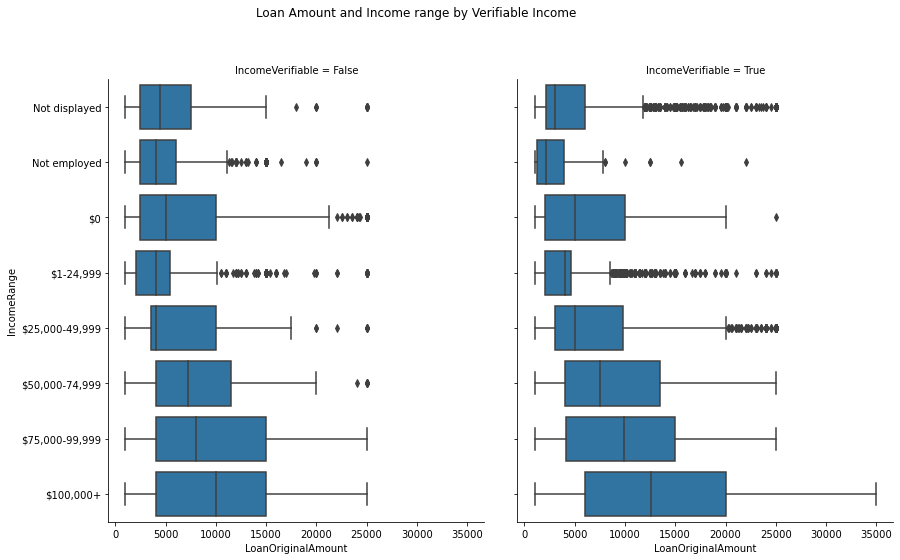

In [30]:
order = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
box = sns.FacetGrid(data = loan, col = 'IncomeVerifiable', height = 4)
box.map(sns.boxplot, 'LoanOriginalAmount', 'IncomeRange', order=order)
plt.suptitle('Loan Amount and Income range by Verifiable Income', y = 1.04)
box.fig.set_size_inches(14,8);

### Observation

People who make more than `$100,000` and whose income is verifiable receive a larger loan amount than those whose income is not verifiable. This is the general pattern, with the exception of those earning `$25,000` or more, who tend to acquire a larger loan amount when their income isn't verified.

### Visualization

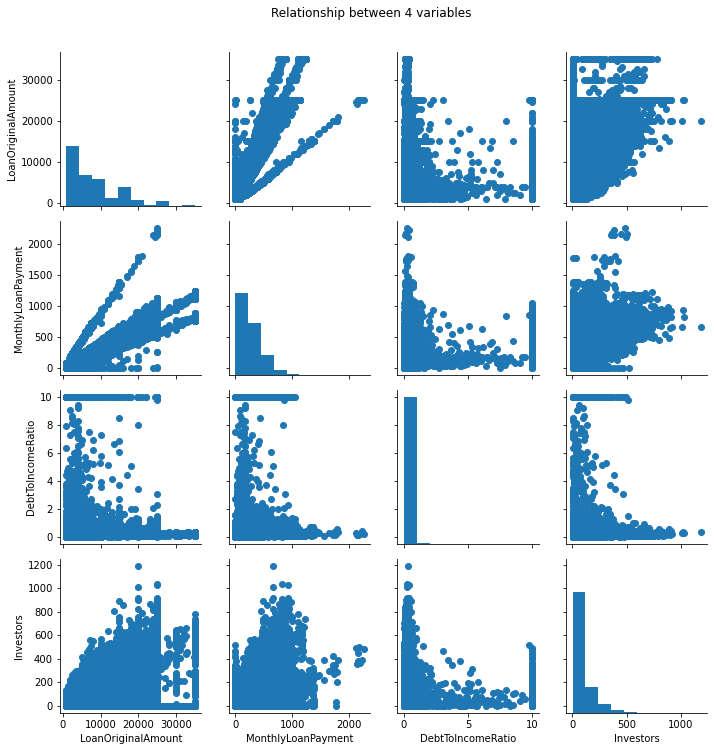

In [31]:
mult = sns.PairGrid(data = loan, vars = ['LoanOriginalAmount', 'MonthlyLoanPayment', 'DebtToIncomeRatio','Investors'])
mult.map_diag(plt.hist)
mult.map_offdiag(plt.scatter)
plt.suptitle('Relationship between 4 variables', y = 1.04);

### Observation

This segmented scatterplot across four key variables not only demonstrates how monthly payment and loan initial amount are positively associated, but it also shows some kind of association between Investors and loan amount. The association between Debt to Income Ratio and Investors, Monthly Loan Payment, and Loan Original Amount is the closest thing to a negative correlation.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The strongest observed association is that between loan amount and monthly payment, closely followed by the influence that being a homeowner has on loan amount. Also, income verification has an impact on loan amount, but this does not appear to be the case when the applicant earns less than `$50,000`

### Were there any interesting or surprising interactions between features?

It was surprised to see that even persons with unverifiable sources of income were awarded more loans than those with salaries of $25k or above.

<a id='conclusion'></a>
## Conclusion

I assumed that because the main reasons for taking out loans were debt consolidation and business, self-employed people would take out more loans than employed people, but this was not the case. I hypothesize that employed people take out more loans because they have a guaranteed source of income that gives them confidence to repay the loan.

The data also revealed that people also borrowed money for trivial things like engagement rings.

The expected loan amount also corresponds with the monthly payment as expected.

Finally, as projected, more homeowners earned between `$75,000` and `$100,000` People with higher incomes were typically given larger loan amounts.